# Machine learning techniques for concrete compressive strength prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Importing the dataset

In [2]:
df = pd.read_csv('Concrete Compressive Strength.csv')

In [3]:
df.head(-5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1020,288.4,121.0,0.0,177.4,7.0,907.9,829.5,28,42.140084
1021,298.2,0.0,107.0,209.7,11.1,879.6,744.2,28,31.875165
1022,264.5,111.0,86.5,195.5,5.9,832.6,790.4,28,41.542308
1023,159.8,250.0,0.0,168.4,12.2,1049.3,688.2,28,39.455954


The dataset consists of 1024 examples, each having 9 attributes (8 input variables and 1 output variable). The seven input variables represent the amount of raw material (measured in kg/m³), and the other one represents Age (in Days)of the concrete. The target variable is Concrete Compressive Strength measured in (MPa — Mega Pascal). Also, this dataset has no missing values.

##### renaming the columns

In [4]:
df.columns = ['Cement (component 1)','Blast Furnace Slag (component 2)','Fly Ash (component 3)',
              'Water (component 4)','Superplasticizer (component 5)',
              'Coarse Aggregate (component 6)','Fine Aggregate (component 7)', 
              'Age','Concrete compressive strength']

In [5]:
df.head(-5)

,Cement (component 1),Blast Furnace Slag (component 2),Fly Ash (component 3),Water (component 4),Superplasticizer (component 5),Coarse Aggregate (component 6),Fine Aggregate (component 7),Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1020,288.4,121.0,0.0,177.4,7.0,907.9,829.5,28,42.140084
1021,298.2,0.0,107.0,209.7,11.1,879.6,744.2,28,31.875165
1022,264.5,111.0,86.5,195.5,5.9,832.6,790.4,28,41.542308
1023,159.8,250.0,0.0,168.4,12.2,1049.3,688.2,28,39.455954


In [6]:
#df.hist(layout=(3,3), figsize=(15,15), grid=False, bins=25)
#plt.show()

### Exploratory data analysis
Finding the correlation between the features

In [7]:
corr = df.corr()

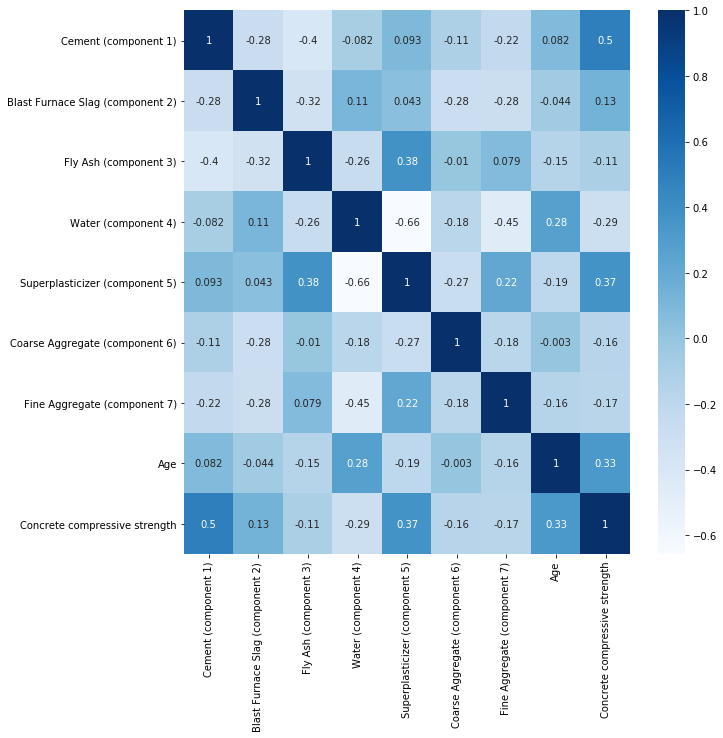

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='Blues', vmin=None, vmax=None)

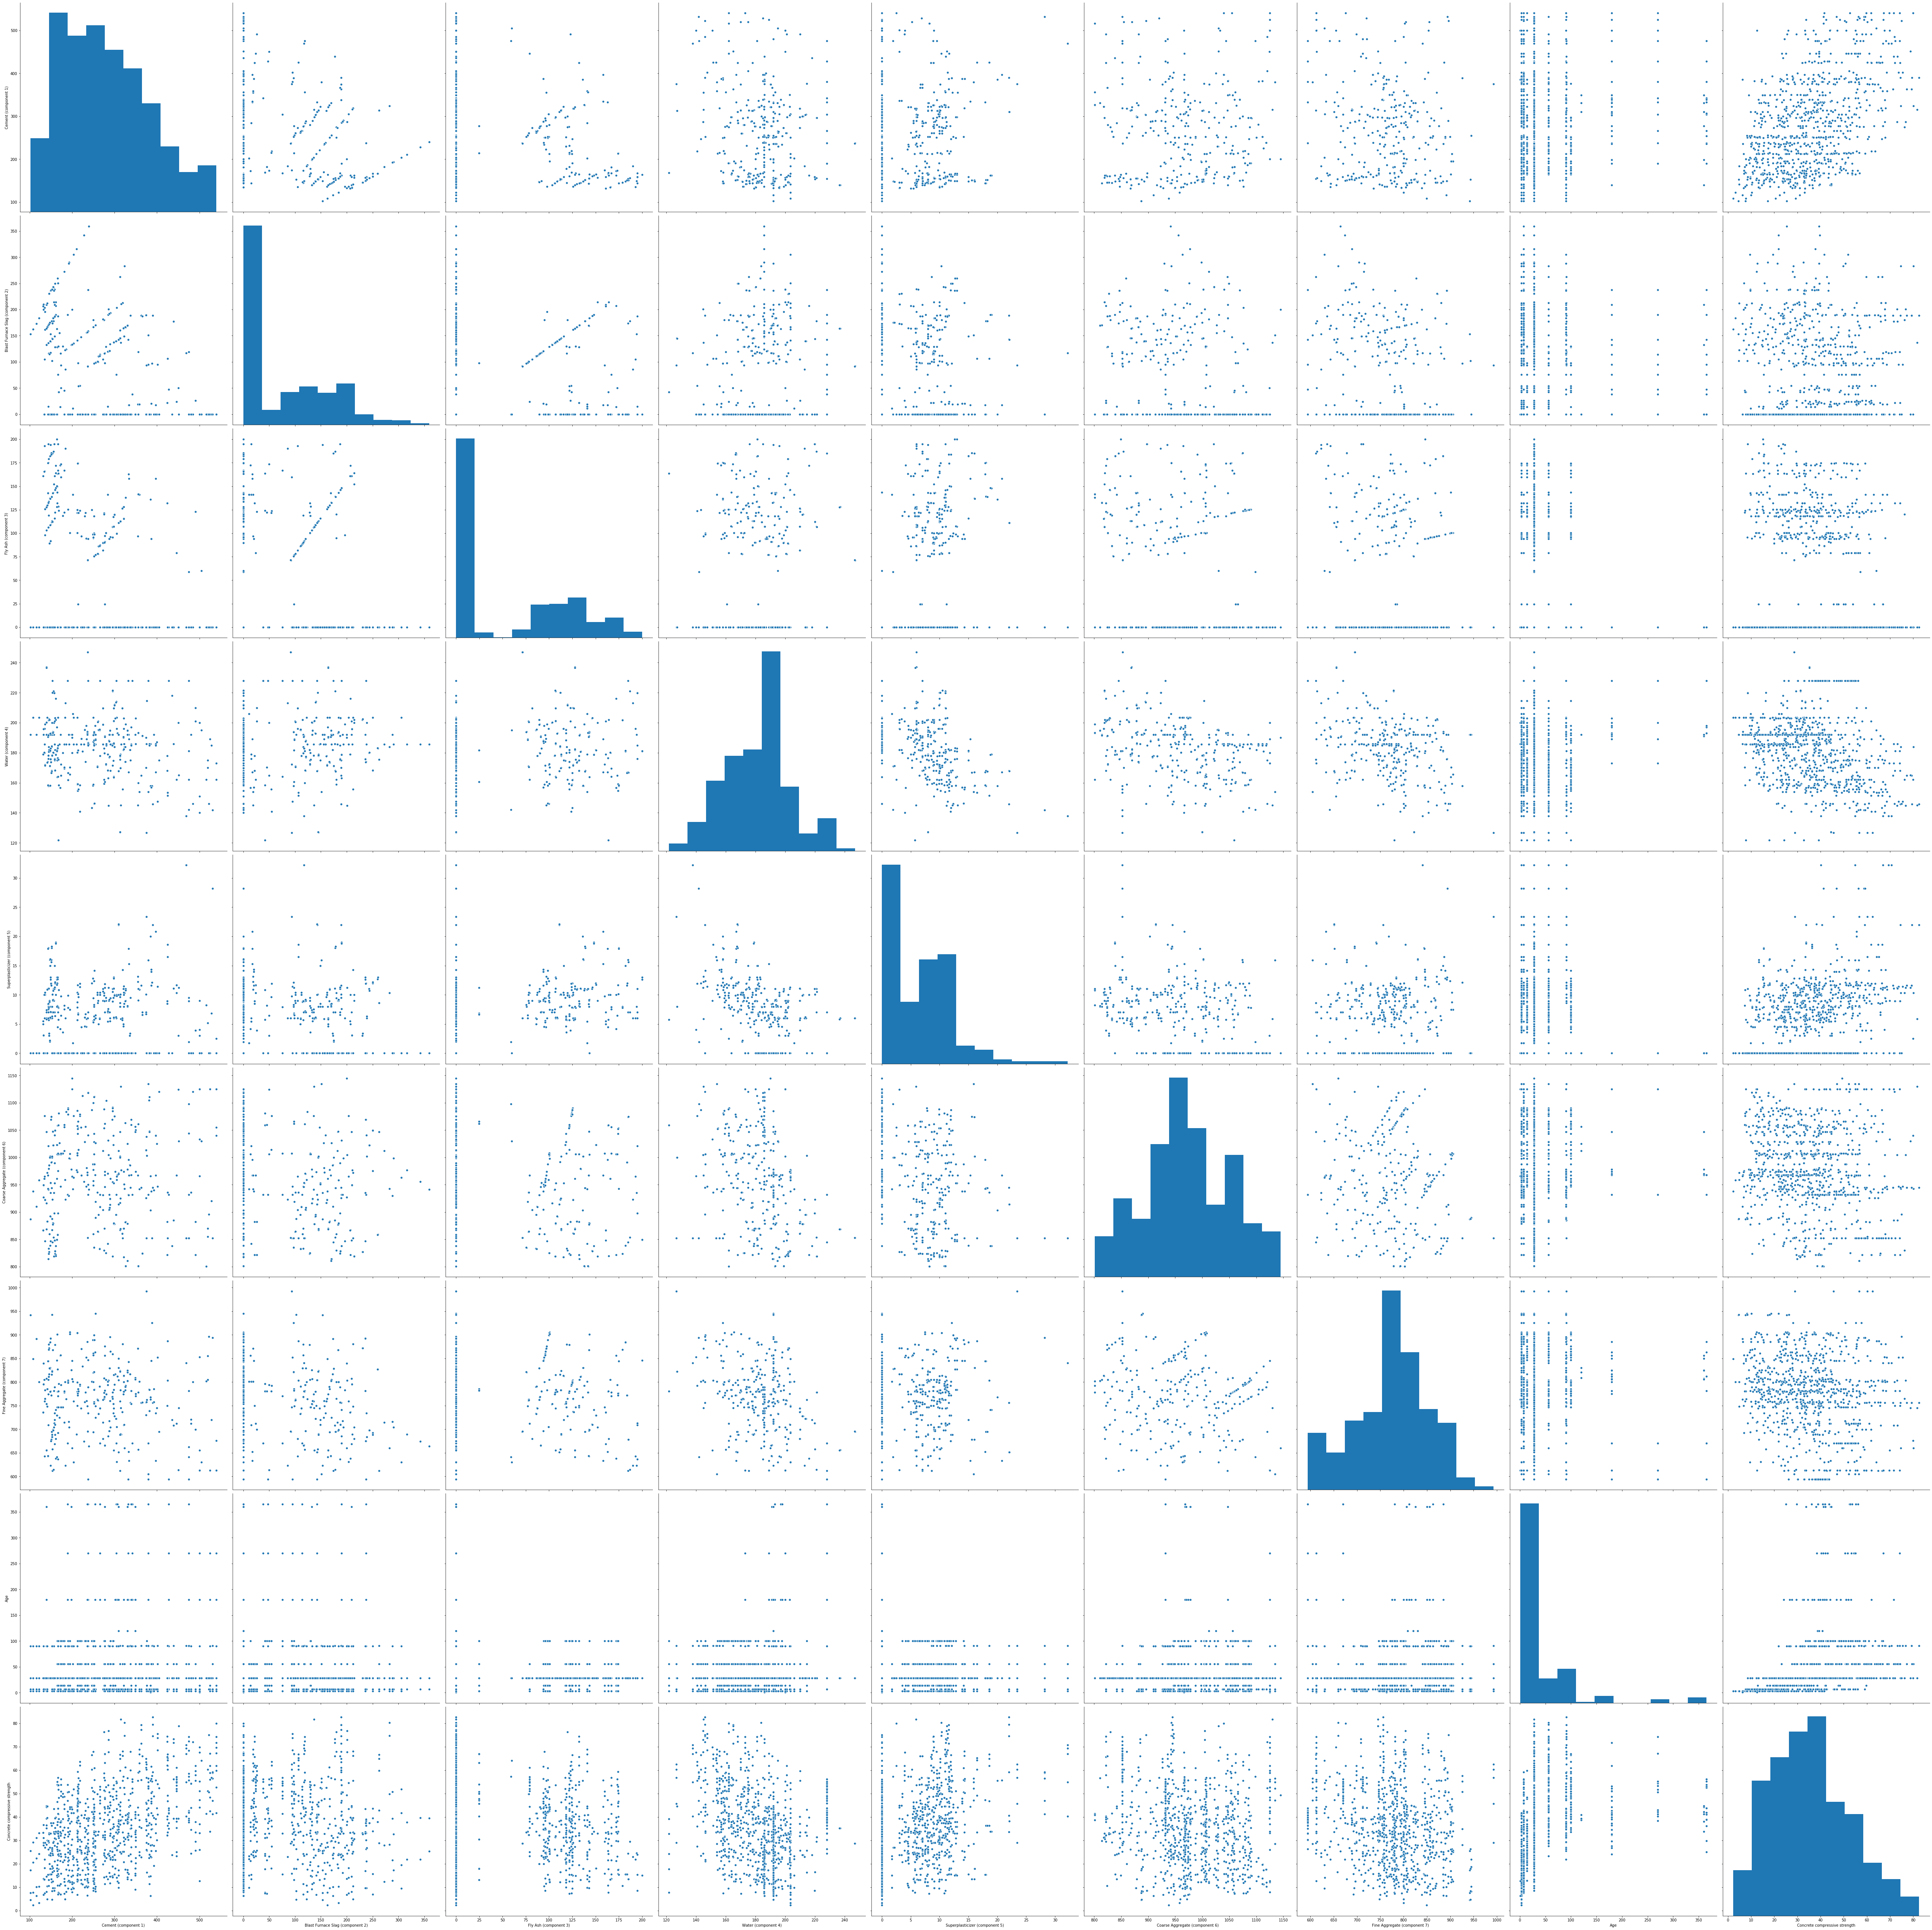

In [9]:
sns.pairplot(df,height=8)

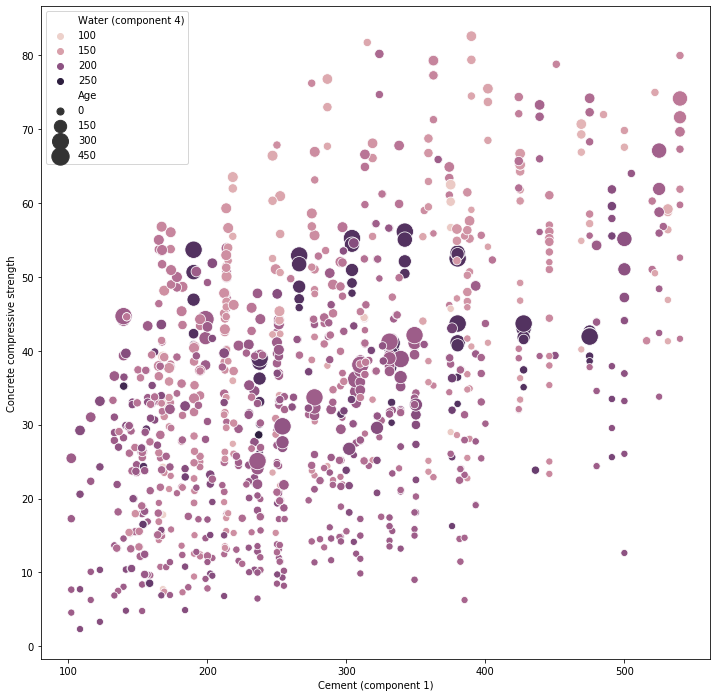

In [10]:
plt.figure(figsize=(12,12))
sns.scatterplot(y=df.iloc[:,8],#concrete compressive strength
                x=df.iloc[:,0],#cement
                hue=df.iloc[:,3],#water
                size=df.iloc[:,7],#age
                data=df,  sizes=(50, 300))

### Data preprocessing
* feature scaling
* Splitting the dataset into train set and test set

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X = df.iloc[:,:8] # Features 
y = df.iloc[:,-1] # Target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 
sc = StandardScaler() #Standardization
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

## Building Machine learning models
After preparing the data, we can fit different models on the training data and compare their performance to choose the algorithm with good performance. As this is a regression problem, we can use RMSE (Root Mean Square Error) and R² score as evaluation metrics.

### Linear regression

In [13]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge 

In [14]:
lr = LinearRegression()
ridge = Ridge() #regularized linear regression

In [15]:
# Fitting models on Training data 
lr.fit(X_train, y_train) 
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
# Making predictions on Test data 
y_pred_lr = lr.predict(X_test) 
y_pred_ridge = ridge.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

In [18]:
print("Model\t\t\t RMSE \t\t R2") 
print("""LinearRegression \t {:.2f} \t\t{:.2f}""".format(np.sqrt(mean_squared_error(y_test, y_pred_lr)), r2_score(y_test, y_pred_lr))) 
print("""RidgeRegression \t {:.2f} \t\t{:.2f}""".format(np.sqrt(mean_squared_error(y_test, y_pred_ridge)), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 R2
LinearRegression 	 11.18 		0.52
RidgeRegression 	 11.17 		0.52


### Decision tree

In [19]:
from sklearn.tree import DecisionTreeRegressor 

In [20]:
dtr = DecisionTreeRegressor() 
dtr.fit(X_train, y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [21]:
y_pred_dtr = dtr.predict(X_test) 

In [22]:
print("Model\t\t\t\t RMSE \t\t R2") 
print("""Decision Tree Regressor \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_dtr)), r2_score(y_test, y_pred_dtr))) 

Model				 RMSE 		 R2
Decision Tree Regressor 	 7.91 		0.76


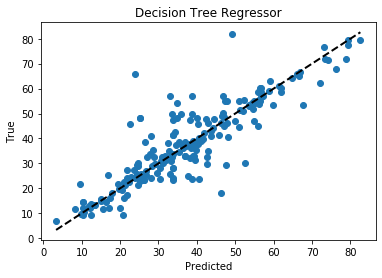

In [23]:
plt.scatter(y_test, y_pred_dtr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Decision Tree Regressor") 
plt.show()

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor 

In [25]:
rfr = RandomForestRegressor(random_state = 42) 
rfr.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [26]:
y_pred_rfr = rfr.predict(X_test) 

In [27]:
print("Model\t\t\t\t RMSE \t\t R2") 
print("""Random Forest Regressor \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_rfr)), r2_score(y_test, y_pred_rfr))) 

Model				 RMSE 		 R2
Random Forest Regressor 	 5.22 		0.90


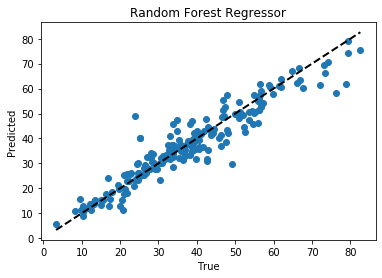

In [28]:
plt.scatter(y_test, y_pred_rfr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("True") 
plt.ylabel("Predicted") 
plt.title("Random Forest Regressor") 
plt.show()

##### Optimized random forest regression

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
from pprint import pprint

In [31]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Creating the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [32]:
# Using the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# searching across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fitting the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [33]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [34]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = rfr
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 3.5767 degrees.
Accuracy = 89.08%.


In [35]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 3.5139 degrees.
Accuracy = 89.33%.


In [36]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.28%.


In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
# Creating the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [95, 100, 105],
    'min_samples_leaf': [2, 1],
    'min_samples_split': [3, 2],
    'n_estimators': [ 1350, 1400, 1450]
}
# Instantiating the grid search model
grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [39]:
# Fitting the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  1.2min finished


{'bootstrap': True,
 'max_depth': 95,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1450}

In [40]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 3.5112 degrees.
Accuracy = 89.34%.


In [41]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.29%.


In [42]:
rfr2 = RandomForestRegressor(bootstrap= True,
 max_depth= 95,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 1450).fit(X_train,y_train)
rfr2

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=95, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1450, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [43]:
y_pred_rfr2 = rfr2.predict(X_test)

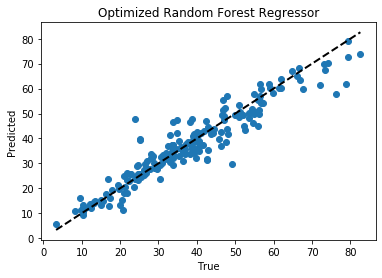

In [44]:
plt.scatter(y_test, y_pred_rfr2) 

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("True") 
plt.ylabel("Predicted") 
plt.title("Optimized Random Forest Regressor") 
plt.show()

### Support vector machine

In [45]:
from sklearn.svm import SVR

In [46]:
svr=SVR().fit(X_train,y_train)
print(svr)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [47]:
y_pred_svr = svr.predict(X_test)

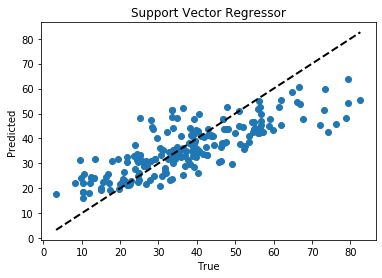

In [48]:
plt.scatter(y_test, y_pred_svr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("True") 
plt.ylabel("Predicted") 
plt.title("Support Vector Regressor") 
plt.show()

##### Optimized Support Vector Regressor:

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
clf = GridSearchCV(SVR(gamma='auto'),
                  {'C':[1,100,500],
                  'kernel':['rbf','linear','poly']},
                  cv=5,return_train_score = False)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto', kernel='rbf', max_iter=-1,
                           shrinking=True, tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 100, 500],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
clf_df = pd.DataFrame(clf.cv_results_)
clf_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014960,0.001092,0.002194,0.000399,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.594977,0.644082,0.583411,0.671540,0.618252,0.622452,0.032169,4
1,0.014760,0.000399,0.001197,0.000399,1,linear,"{'C': 1, 'kernel': 'linear'}",0.454438,0.594356,0.595875,0.669224,0.597238,0.582226,0.069939,6
2,0.011768,0.001323,0.001397,0.000488,1,poly,"{'C': 1, 'kernel': 'poly'}",0.424664,0.552139,0.490447,0.556410,0.488682,0.502468,0.048508,9
3,0.041499,0.002588,0.002383,0.000476,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.847335,0.896501,0.873865,0.881982,0.871147,0.874166,0.016057,1
4,0.150799,0.018647,0.001194,0.000391,100,linear,"{'C': 100, 'kernel': 'linear'}",0.442912,0.577020,0.594333,0.669684,0.586420,0.574074,0.073371,7
5,0.152800,0.034552,0.001397,0.000489,100,poly,"{'C': 100, 'kernel': 'poly'}",0.666516,0.606770,0.655095,0.699818,0.655557,0.656751,0.029841,3
6,0.148592,0.011240,0.002194,0.000399,500,rbf,"{'C': 500, 'kernel': 'rbf'}",0.838994,0.886983,0.853829,0.891607,0.872858,0.868854,0.019899,2
7,0.555313,0.069405,0.000987,0.000020,500,linear,"{'C': 500, 'kernel': 'linear'}",0.443235,0.576813,0.594342,0.669516,0.586419,0.574065,0.073210,8
8,1.182479,0.260707,0.001196,0.000400,500,poly,"{'C': 500, 'kernel': 'poly'}",0.673749,0.500401,0.620957,0.637694,0.672096,0.620979,0.063586,5


In [52]:
clf_df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.622452
1,1,linear,0.582226
2,1,poly,0.502468
3,100,rbf,0.874166
4,100,linear,0.574074
5,100,poly,0.656751
6,500,rbf,0.868854
7,500,linear,0.574065
8,500,poly,0.620979


In [53]:
clf.best_score_

0.8741661707691433

In [54]:
clf.best_params_

{'C': 100, 'kernel': 'rbf'}

In [55]:
svr2 = SVR(
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    C=100,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
).fit(X_train,y_train)
svr2

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [56]:
y_pred_svr2 = svr2.predict(X_test)

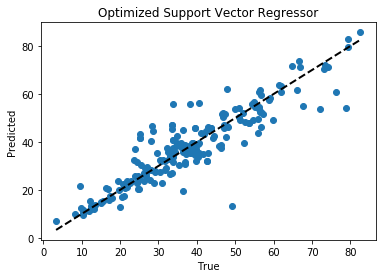

In [57]:
plt.scatter(y_test, y_pred_svr2) 

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("True") 
plt.ylabel("Predicted") 
plt.title("Optimized Support Vector Regressor") 
plt.show()

In [58]:
print("Model\t\t\t\t RMSE \t\t R2") 
print("""Random Forest Regressor \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_svr2)), r2_score(y_test, y_pred_svr2))) 

Model				 RMSE 		 R2
Random Forest Regressor 	 6.89 		0.82


### Performance of different models

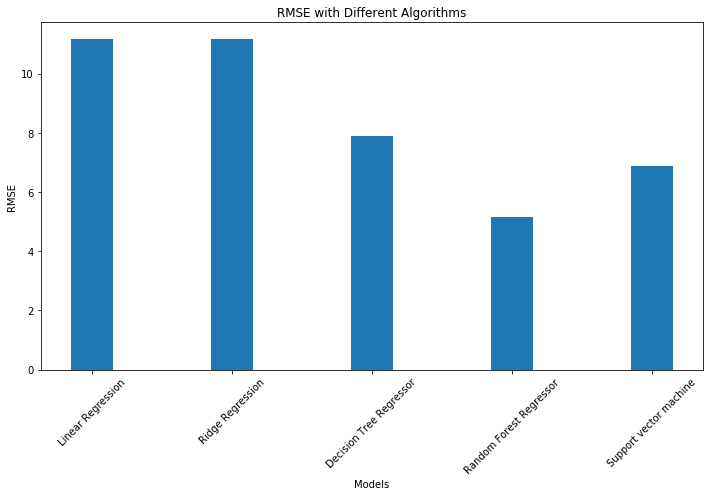

In [59]:
models = [lr, ridge, dtr, rfr2, svr2] 
names = ["Linear Regression", "Ridge Regression", "Decision Tree Regressor", "Random Forest Regressor","Support vector machine"] 
rmses = [] 
for model in models: 
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))) 
x = np.arange(len(names)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(10,7)) 
rects = ax.bar(x, rmses, width) 
ax.set_ylabel('RMSE') 
ax.set_xlabel('Models') 
ax.set_title('RMSE with Different Algorithms') 
ax.set_xticks(x) 
ax.set_xticklabels(names, rotation=45) 
#autolabel(rects) 
fig.tight_layout() 
plt.show()